<a href="https://colab.research.google.com/github/educbd/ML_/blob/main/P_3_Customer_Behavior_Analysis_%5BPROBLEM%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# E-commerce data EDA for Customer Behavior Analysis

EDA (Exploratory Data Analysis) of E-Commerce data will help us understand the data and think of ways to use it to understand the customer behavior.

## 1. Load libraries

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.gridspec import GridSpec

from scipy import stats
from sklearn.metrics import f1_score,confusion_matrix,classification_report
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

## 2. Load Data

In [126]:
# --- Read the data ---
df = pd.read_csv("https://raw.githubusercontent.com/educbd/Marketing/main/Customer_Behavior_Data.csv",sep= ";",decimal=",")

## EDA

With every new dataset we need to got throuhg an EDA (Exploratory Data Analysis) process. It's a good idea to have a basic framework in mind for our EDAs. It is always a good idea to:

- Understand what our columns say
- Rename columns labels and make them lowercase
- Make sure that the data types of columns are correct
- Handle missing values
- Check for duplicates
- Search for outliers
- Check for linearity between variables

To achieve this we can take advantage of Pandas and visualisation libraries

## Statistical Analysis

Are there missing values in the data? (see .info() results) so we can move on and check our descriptive statistics with the .describe() function.

In [127]:
# --- Fixing column names ---
df.columns = df.columns.str.replace(" ","_")

In [128]:
# --- Replacing all "yes", "no" to "1", "0" in all features---
for i in df.select_dtypes(include=['object']).columns.values:
  df[i] = df[i].replace(['yes','no'], [1,0])

In [129]:
df.sample(3)

,account_length,location_code,user_id,credit_card_info_save,push_status,add_to_wishlist,desktop_sessions,app_sessions,desktop_transactions,total_product_detail_views,session_duration,promotion_clicks,avg_order_value,sale_product_views,discount_rate_per_visited_products,product_detail_view_per_app_session,app_transactions,add_to_cart_per_session,customer_service_calls,churn
1552,75,408,3353681,0,0,0,148,25,16,110,192,97,135.0,68,6.08,16.4,3,4.43,2,0
3272,133,510,3737974,0,0,0,295,50,19,141,224,101,229.4,109,10.32,12.9,4,3.48,2,1
543,26,415,3933300,0,0,0,235,40,18,109,217,129,191.6,94,8.62,3.5,6,0.95,3,0


In [130]:
df.shape

(3333, 20)

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   account_length                       3333 non-null   int64  
 1   location_code                        3333 non-null   int64  
 2   user_id                              3333 non-null   int64  
 3   credit_card_info_save                3333 non-null   int64  
 4   push_status                          3333 non-null   int64  
 5   add_to_wishlist                      3333 non-null   int64  
 6   desktop_sessions                     3333 non-null   int64  
 7   app_sessions                         3333 non-null   int64  
 8   desktop_transactions                 3333 non-null   int64  
 9   total_product_detail_views           3333 non-null   int64  
 10  session_duration                     3333 non-null   int64  
 11  promotion_clicks              

In [132]:
round(df.describe(),2)

,account_length,location_code,user_id,credit_card_info_save,push_status,add_to_wishlist,desktop_sessions,app_sessions,desktop_transactions,total_product_detail_views,session_duration,promotion_clicks,avg_order_value,sale_product_views,discount_rate_per_visited_products,product_detail_view_per_app_session,app_transactions,add_to_cart_per_session,customer_service_calls,churn
count,3333.00,3333.00,3333.00,3333.0,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00
mean,101.06,437.18,3746291.29,0.1,0.28,8.10,179.81,30.57,17.09,100.44,201.04,100.11,200.87,100.11,9.04,10.24,4.48,2.76,1.56,0.14
std,39.82,42.37,274662.57,0.3,0.45,13.69,54.46,9.27,4.32,20.07,50.71,19.92,50.57,19.57,2.28,2.79,2.46,0.75,1.32,0.35
min,1.00,408.00,3271058.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.20,33.00,1.04,0.00,0.00,0.00,0.00,0.00
25%,74.00,408.00,3508680.00,0.0,0.00,0.00,144.00,24.00,14.00,87.00,167.00,87.00,167.00,87.00,7.52,8.50,3.00,2.30,1.00,0.00
50%,101.00,415.00,3748187.00,0.0,0.00,0.00,179.00,31.00,17.00,101.00,201.00,100.00,201.20,100.00,9.05,10.30,4.00,2.78,1.00,0.00
75%,127.00,510.00,3985970.00,0.0,1.00,20.00,216.00,37.00,20.00,114.00,235.00,114.00,235.30,113.00,10.59,12.10,6.00,3.27,2.00,0.00
max,243.00,510.00,4229964.00,1.0,1.00,51.00,351.00,60.00,31.00,165.00,364.00,170.00,395.00,175.00,17.77,20.00,20.00,5.40,9.00,1.00


In [133]:
def sniff_modified(df):
    with pd.option_context("display.max_colwidth", 20):
        info = pd.DataFrame()
        info['sample'] = df.iloc[0]
        info['data type'] = df.dtypes
        info['percent missing'] = df.isnull().sum()*100/len(df)
        info['No. unique'] = df.apply(lambda x: len(x.unique()))
        info['unique values'] = df.apply(lambda x: x.unique())
        return info

In [134]:
sniff_modified(df)

,sample,data type,percent missing,No. unique,unique values
account_length,128.00,int64,0.0,212,"[128, 107, 137, 84, 75, 118, 121, 147, 117, 14..."
location_code,415.00,int64,0.0,3,"[415, 408, 510]"
user_id,3824657.00,int64,0.0,3333,"[3824657, 3717191, 3581921, 3759999, 3306626, ..."
credit_card_info_save,0.00,int64,0.0,2,"[0, 1]"
push_status,1.00,int64,0.0,2,"[1, 0]"
add_to_wishlist,25.00,int64,0.0,46,"[25, 26, 0, 24, 37, 27, 33, 39, 30, 41, 28, 34..."
desktop_sessions,265.00,int64,0.0,295,"[265, 162, 243, 299, 167, 223, 218, 157, 185, ..."
app_sessions,45.00,int64,0.0,60,"[45, 27, 41, 51, 28, 38, 37, 31, 44, 22, 32, 2..."
desktop_transactions,17.00,int64,0.0,30,"[17, 10, 5, 13, 19, 30, 9, 14, 21, 26, 27, 24,..."
total_product_detail_views,110.00,int64,0.0,119,"[110, 123, 114, 71, 113, 98, 88, 79, 97, 84, 1..."


## 3. Handle Missing Values

Missing values can be an issue with most real-life datasets. We can use the .info() function, there are no missing values. For the sake of double checking and to show a way of checking whether the dataset has missing values, let's write some code below

In [135]:
# --- Let's make sure there is no null values ---
df.isnull().sum()

account_length                         0
location_code                          0
user_id                                0
credit_card_info_save                  0
push_status                            0
add_to_wishlist                        0
desktop_sessions                       0
app_sessions                           0
desktop_transactions                   0
total_product_detail_views             0
session_duration                       0
promotion_clicks                       0
avg_order_value                        0
sale_product_views                     0
discount_rate_per_visited_products     0
product_detail_view_per_app_session    0
app_transactions                       0
add_to_cart_per_session                0
customer_service_calls                 0
churn                                  0
dtype: int64

## 4. Check for duplicates

Another common issue with data is duplicated records. We need to make sure to always check for duplicates

In [136]:
# --- Any duplicated values? ---
print(f"The dataset contains **{df.duplicated().sum()}** duplicate rows.")

The dataset contains **0** duplicate rows.


## 5. Search for outliers

- Outliers are data points at the extreme points of a dataset.
- Some outliers represent true values from natural variation in the population and some occur because of dirty or incorect data.
    - Because of this, we need to be careful when we cleanse our data
    - If the outliers are True outliers, we should probably keep them in our data since they represent natural variations in our sample
    - If the outliers are errors we should generally remove those data points
    
We've already identified some potential outliers from our .describe() function with session durations, average order value, promotion clicks, sale product views, app transactions, account length, add to wish list, desktop sessions, and customer service calls.

To identify our outliers we can use:
- Visualisations such as histograms and blox plots
- Use interquartiles with rules such as:
    - outlier < Q1 - 1.5(IQR)
    - outlier > Q3 + 1.5(IQR)

In [137]:
# --- Now let's break the data into numerical and categorical features ---
categorical_columns = ["location_code","push_status","credit_card_info_save"]
numeric_columns = ['account_length', 'add_to_wishlist', 'desktop_sessions',
                   'app_sessions', 'desktop_transactions', 'total_product_detail_views',
                   'session_duration', 'promotion_clicks', 'avg_order_value',
                   'sale_product_views', 'discount_rate_per_visited_products','product_detail_view_per_app_session',
                   'app_transactions', 'add_to_cart_per_session', 'customer_service_calls']
out_of_analyze = ["user_id","churn"]

In [138]:
# --- Search for Outliers ---
outliers = []
for i in numeric_columns:
    outliers.extend(df[(df[i] < df[i].mean() - 3*df[i].std()) | (df[i] > df[i].mean() + 3*df[i].std())].index)

In [139]:
# --- Drop Outliers ---
df.drop(set(outliers),inplace = True)

In [140]:
df.shape

(3168, 20)

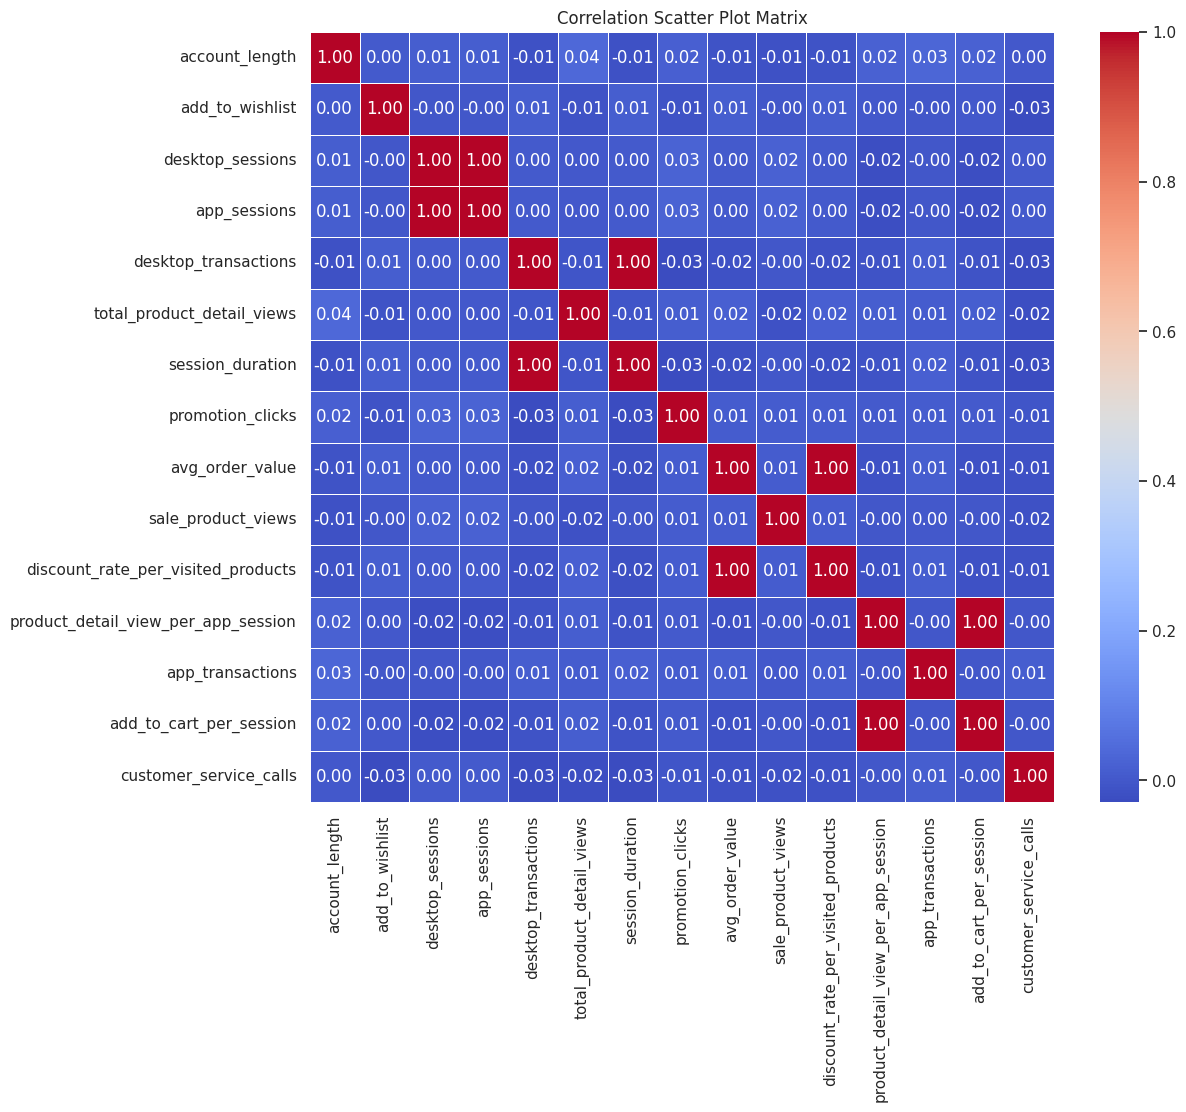

In [141]:
# --- Check for linearity between variables ---

# Create a subset DataFrame with only the numerical features
numerical_df = df[numeric_columns]

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Create a correlation scatter plot matrix
plt.figure(figsize=(12, 10))
sns.set(font_scale=1.0)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Scatter Plot Matrix")

plt.show()

### 6. Repeat with the rest of the variables

This is EDA, so we are going to visualize all the variables we identified as having potentail outliers

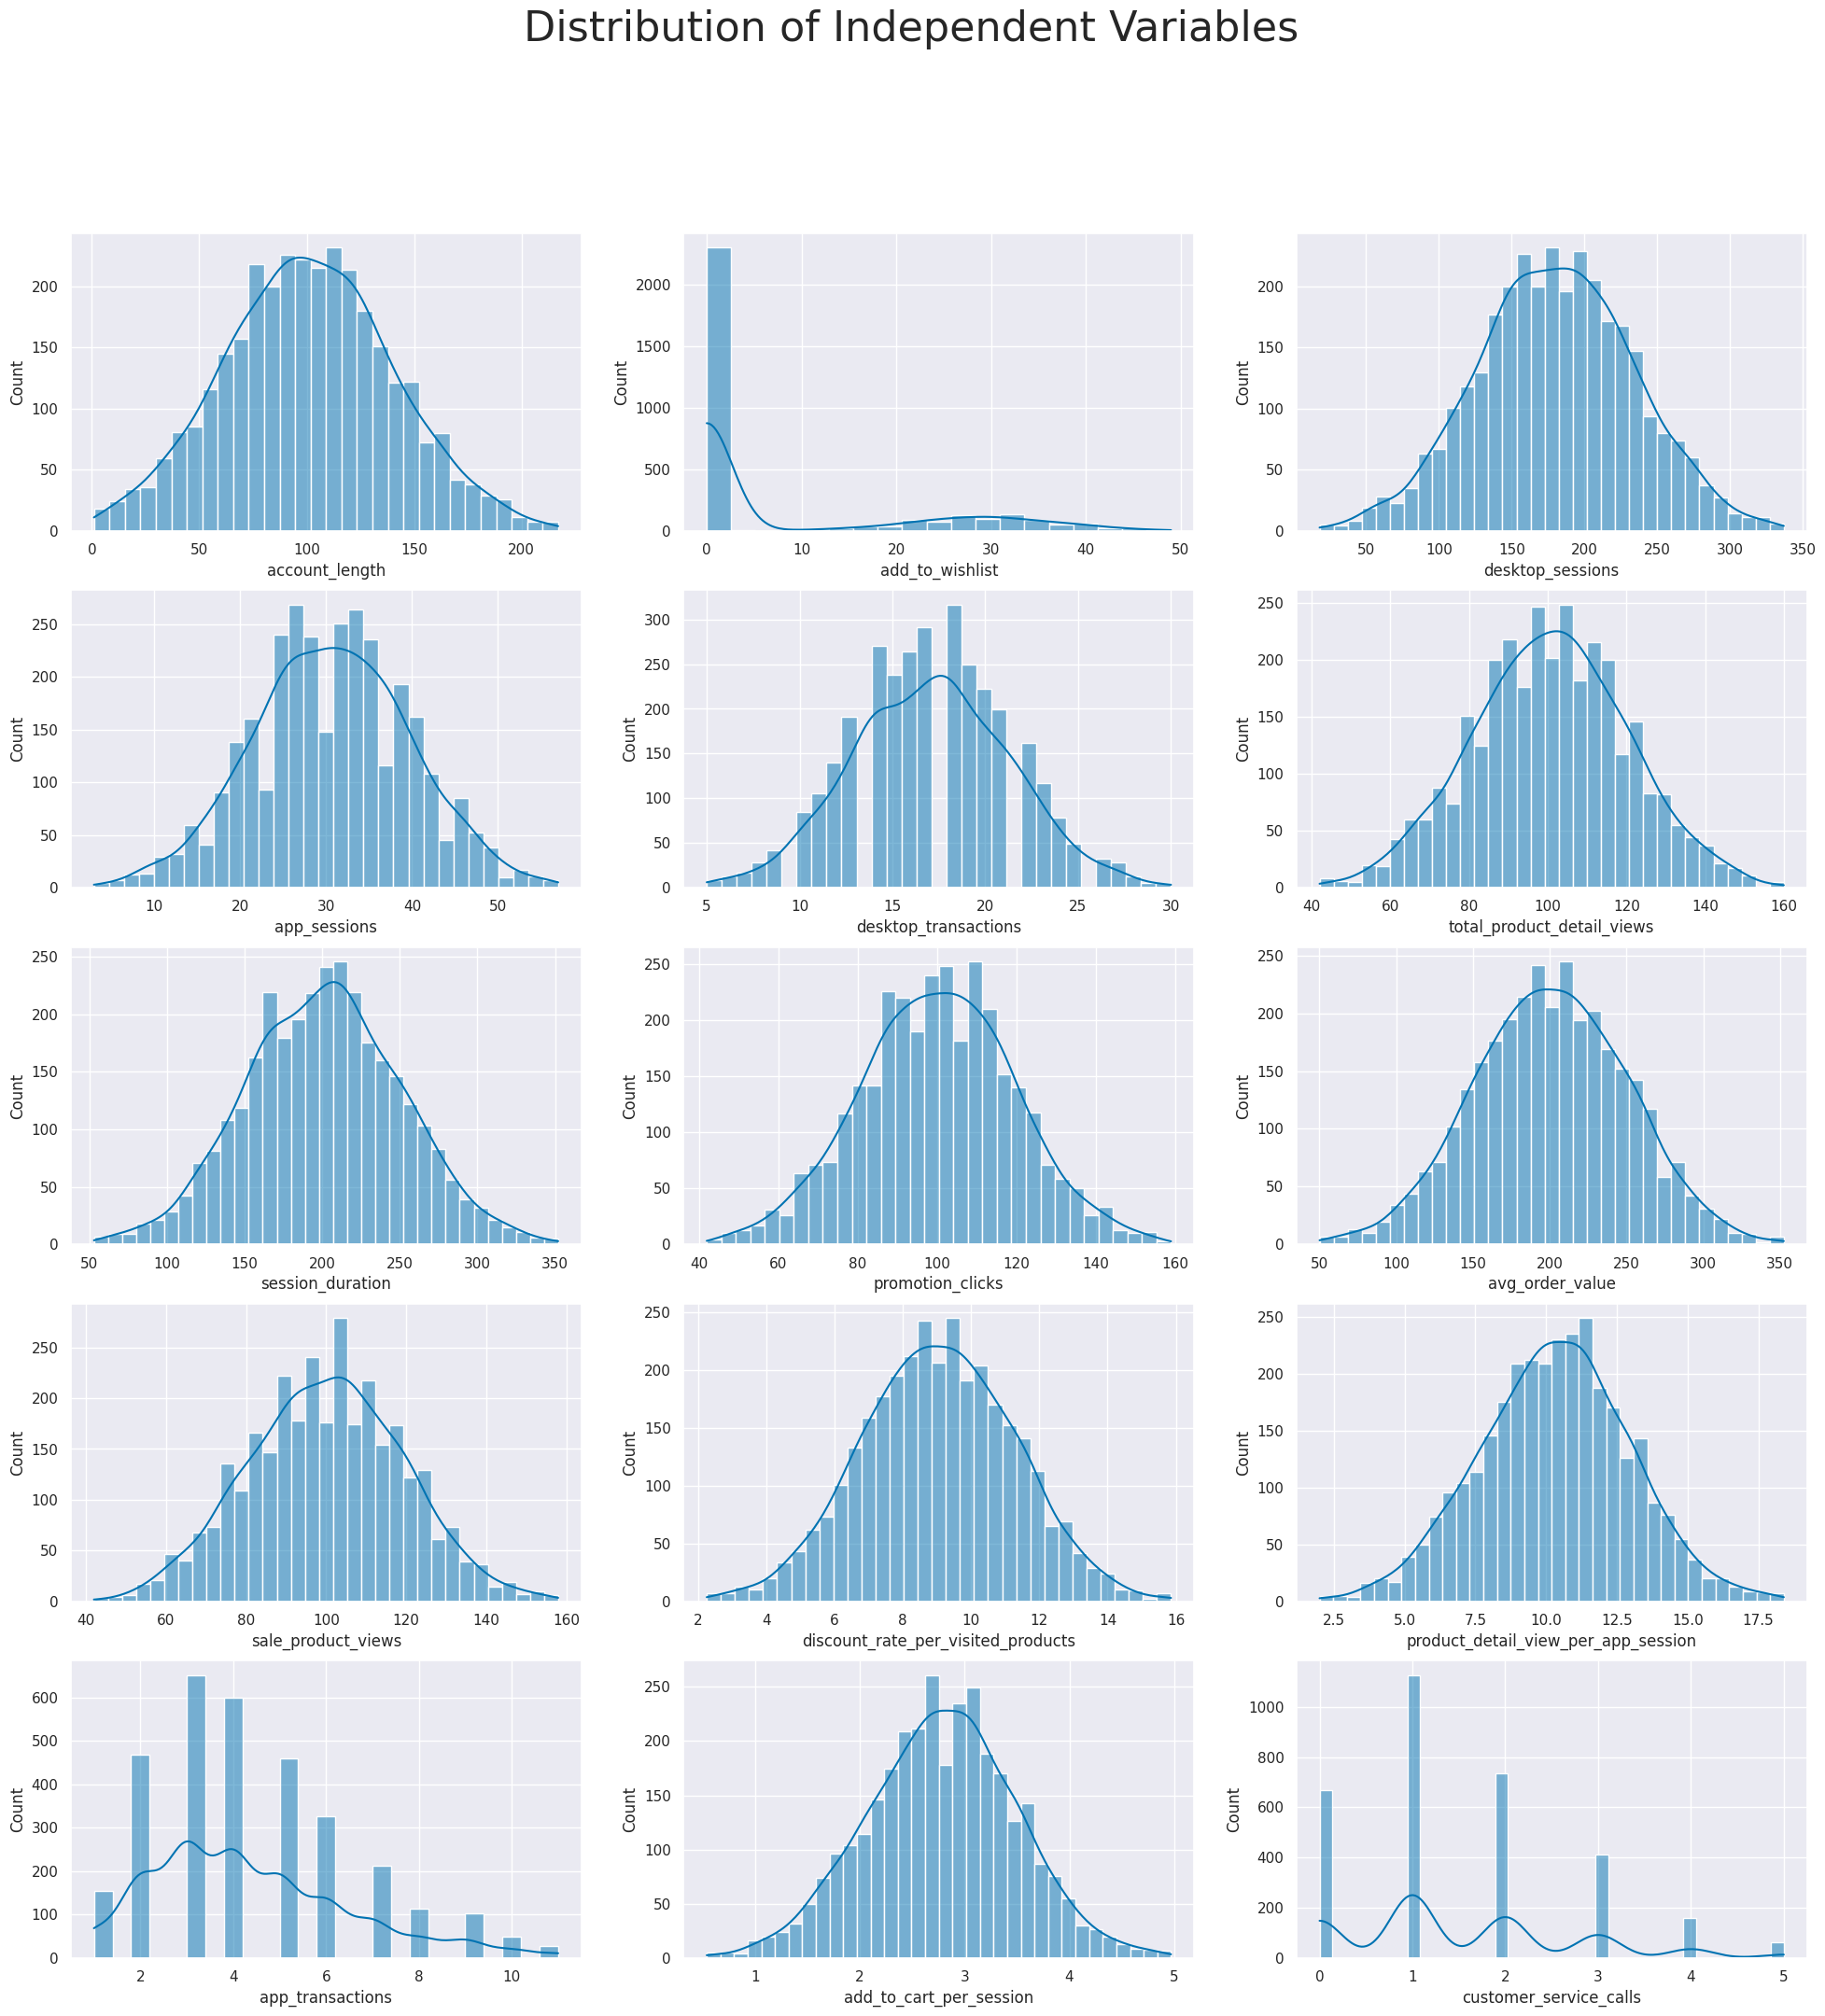

In [142]:
sns.set_palette(palette="colorblind")
fig, axes = plt.subplots(5,3, figsize=(24,24))
fig.suptitle("Distribution of Independent Variables", size=32)
for i in range(5):
    for j in range(3):
        sns.histplot(df[numeric_columns[3*i+j]], ax=axes[i,j], kde=True)

Let's plot the churn variable to observe its distribution relative to the not-churn.

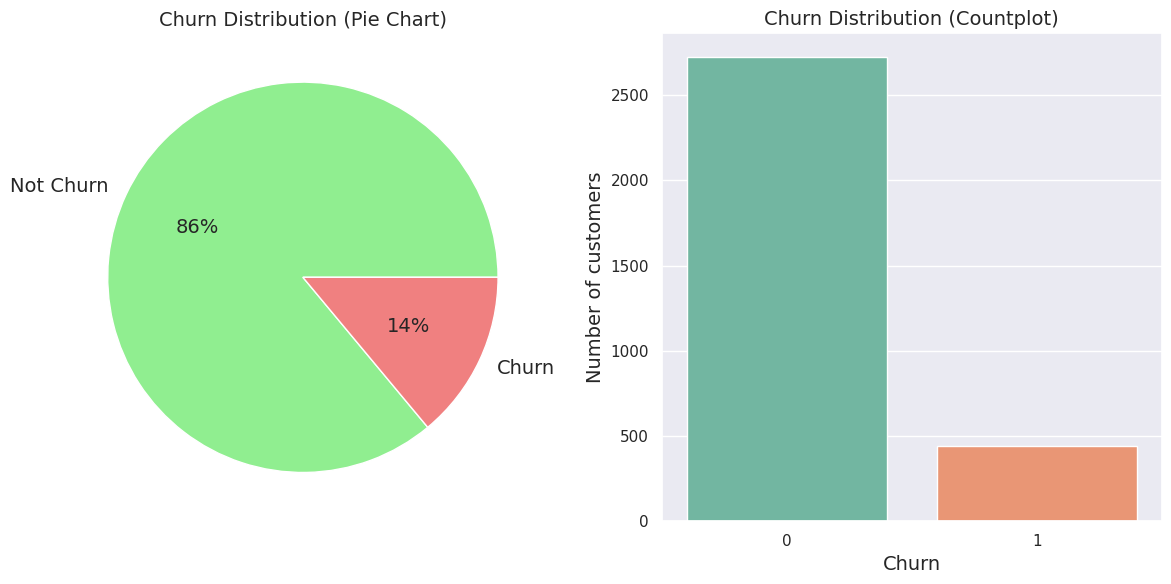

In [143]:
# Create a 1x2 grid of subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot the pie chart on the first subplot (ax[0])
churn_counts = df['churn'].value_counts()
ax[0].pie(churn_counts, labels=["Not Churn", "Churn"], colors=["lightgreen", "lightcoral"], autopct='%.0f%%', textprops={'fontsize': 14})
ax[0].set_title("Churn Distribution (Pie Chart)", fontsize=14)

# Create a countplot on the second subplot (ax[1])
cp = sns.countplot(x = df['churn'], palette="Set2", ax=ax[1])
cp.set_xlabel("Churn", fontsize=14)
cp.set_ylabel("Number of customers", fontsize=14)
ax[1].set_title("Churn Distribution (Countplot)", fontsize=14)

plt.tight_layout()
plt.show()

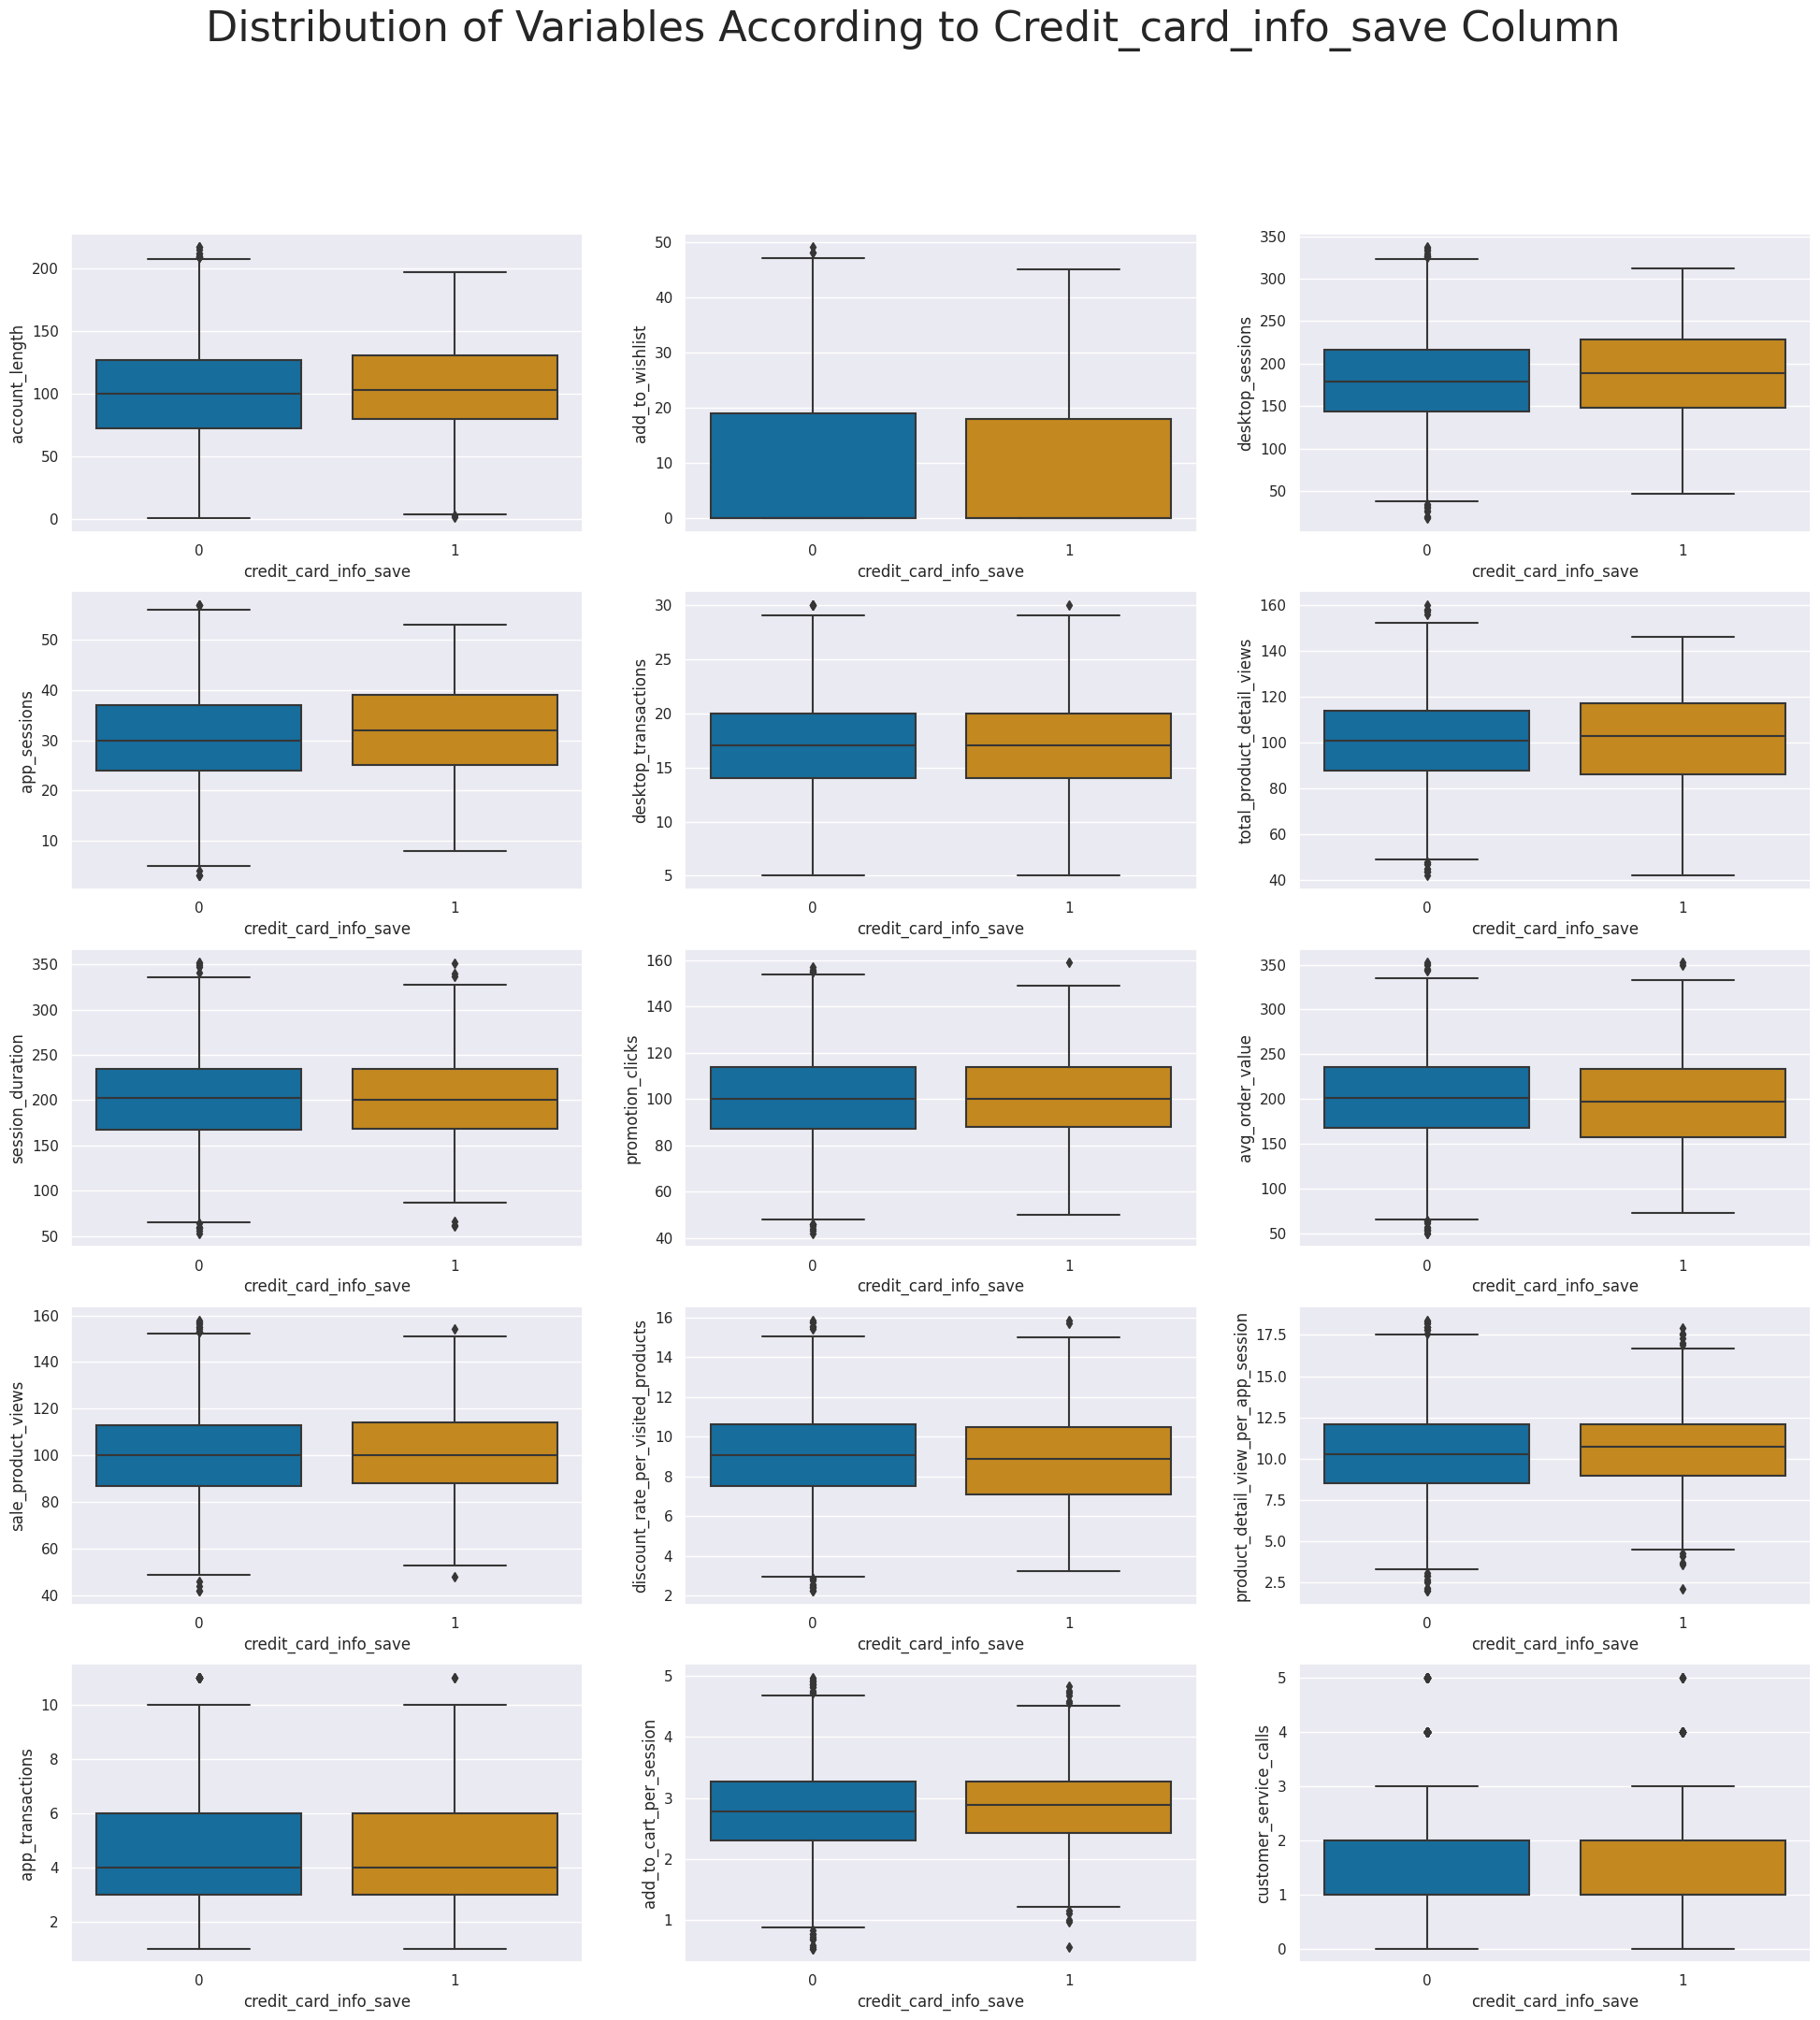

In [144]:
fig, axes = plt.subplots(5,3, figsize=(24,24))
fig.suptitle("Distribution of Variables According to Credit_card_info_save Column", size=32)
for i in range(5):
    for j in range(3):
        sns.boxplot(x=df['credit_card_info_save'], y=df[numeric_columns[3*i+j]], ax=axes[i,j])

# 7. Conclusions based on visualisations

- All of the numerical variables in the dataset has outliers from a statistical point of view. What is apparent is that all of the outliers represent natural variations as in e-commerce we expect such variations, making the outliers **"True outliers"**.
- If we had Outliers that we believe them to be data errors we could always use techniques such as removing all data points that are < Q1 - 1.5(IQR) and > Q3 +1.5(IQR) or removing data points that are 3 standard deviations below or above mean (example code below if you need to use it)

# 8. Plot Churn against the categorical data

# 8.1 Observations from the categorical columns plots

- Majority of customers are in location code 415
- Majority of customers don't allow push notifications
- Majority of customers don't store their credit card information on the side

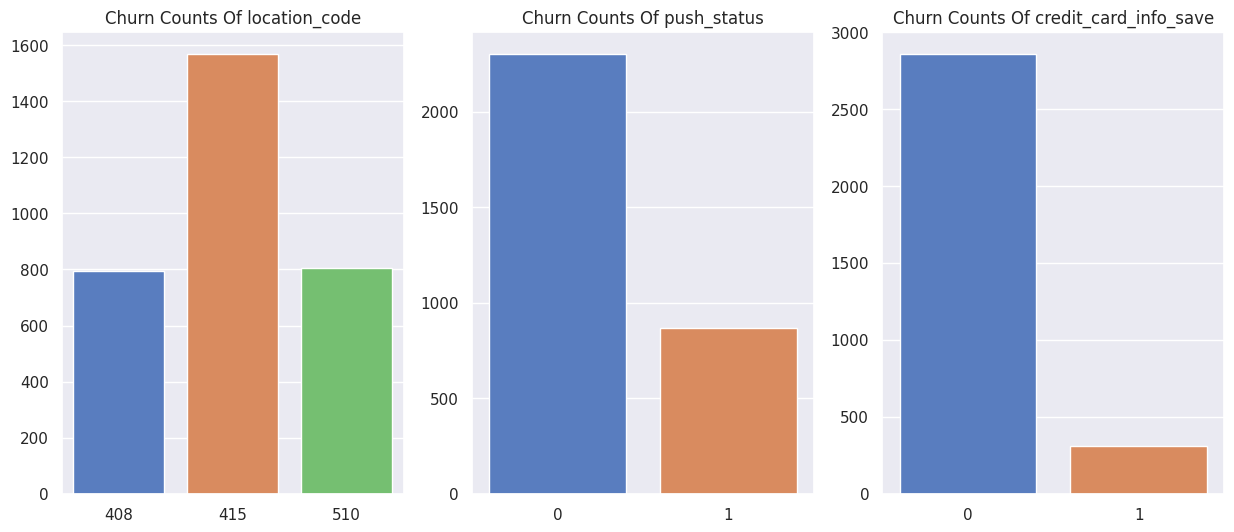

In [145]:
fig, ax = plt.subplots(1,len(categorical_columns),figsize= (15,6))
for i,a in zip(categorical_columns,ax):
    temp = df[i].value_counts()
    a.set_title("Churn Counts Of " + str(i))
    sns.barplot(ax = a, x=temp.index, y=temp.values, palette="muted")
plt.show()

# 8.2 Plot categorical data against the Churn

Observations from plotting categorical data against Churn

- The location codes have a similar percentage of churns, meaning that location might not be a strong indication for churn
- Customers with push status activated are less likely to be churns, meaning that motivating customers to activate push status might help minimize churns
- Customers with their credit card information saved on the side are far less likely to be churns than customers without their credit card info saved. This means that if the shop motivates people to save their credit card info might minimize churns.
    - This makes sense since customers who trust their credit card info on a side indicate that they trust the brand. More trust less chances of customers leaving your business.

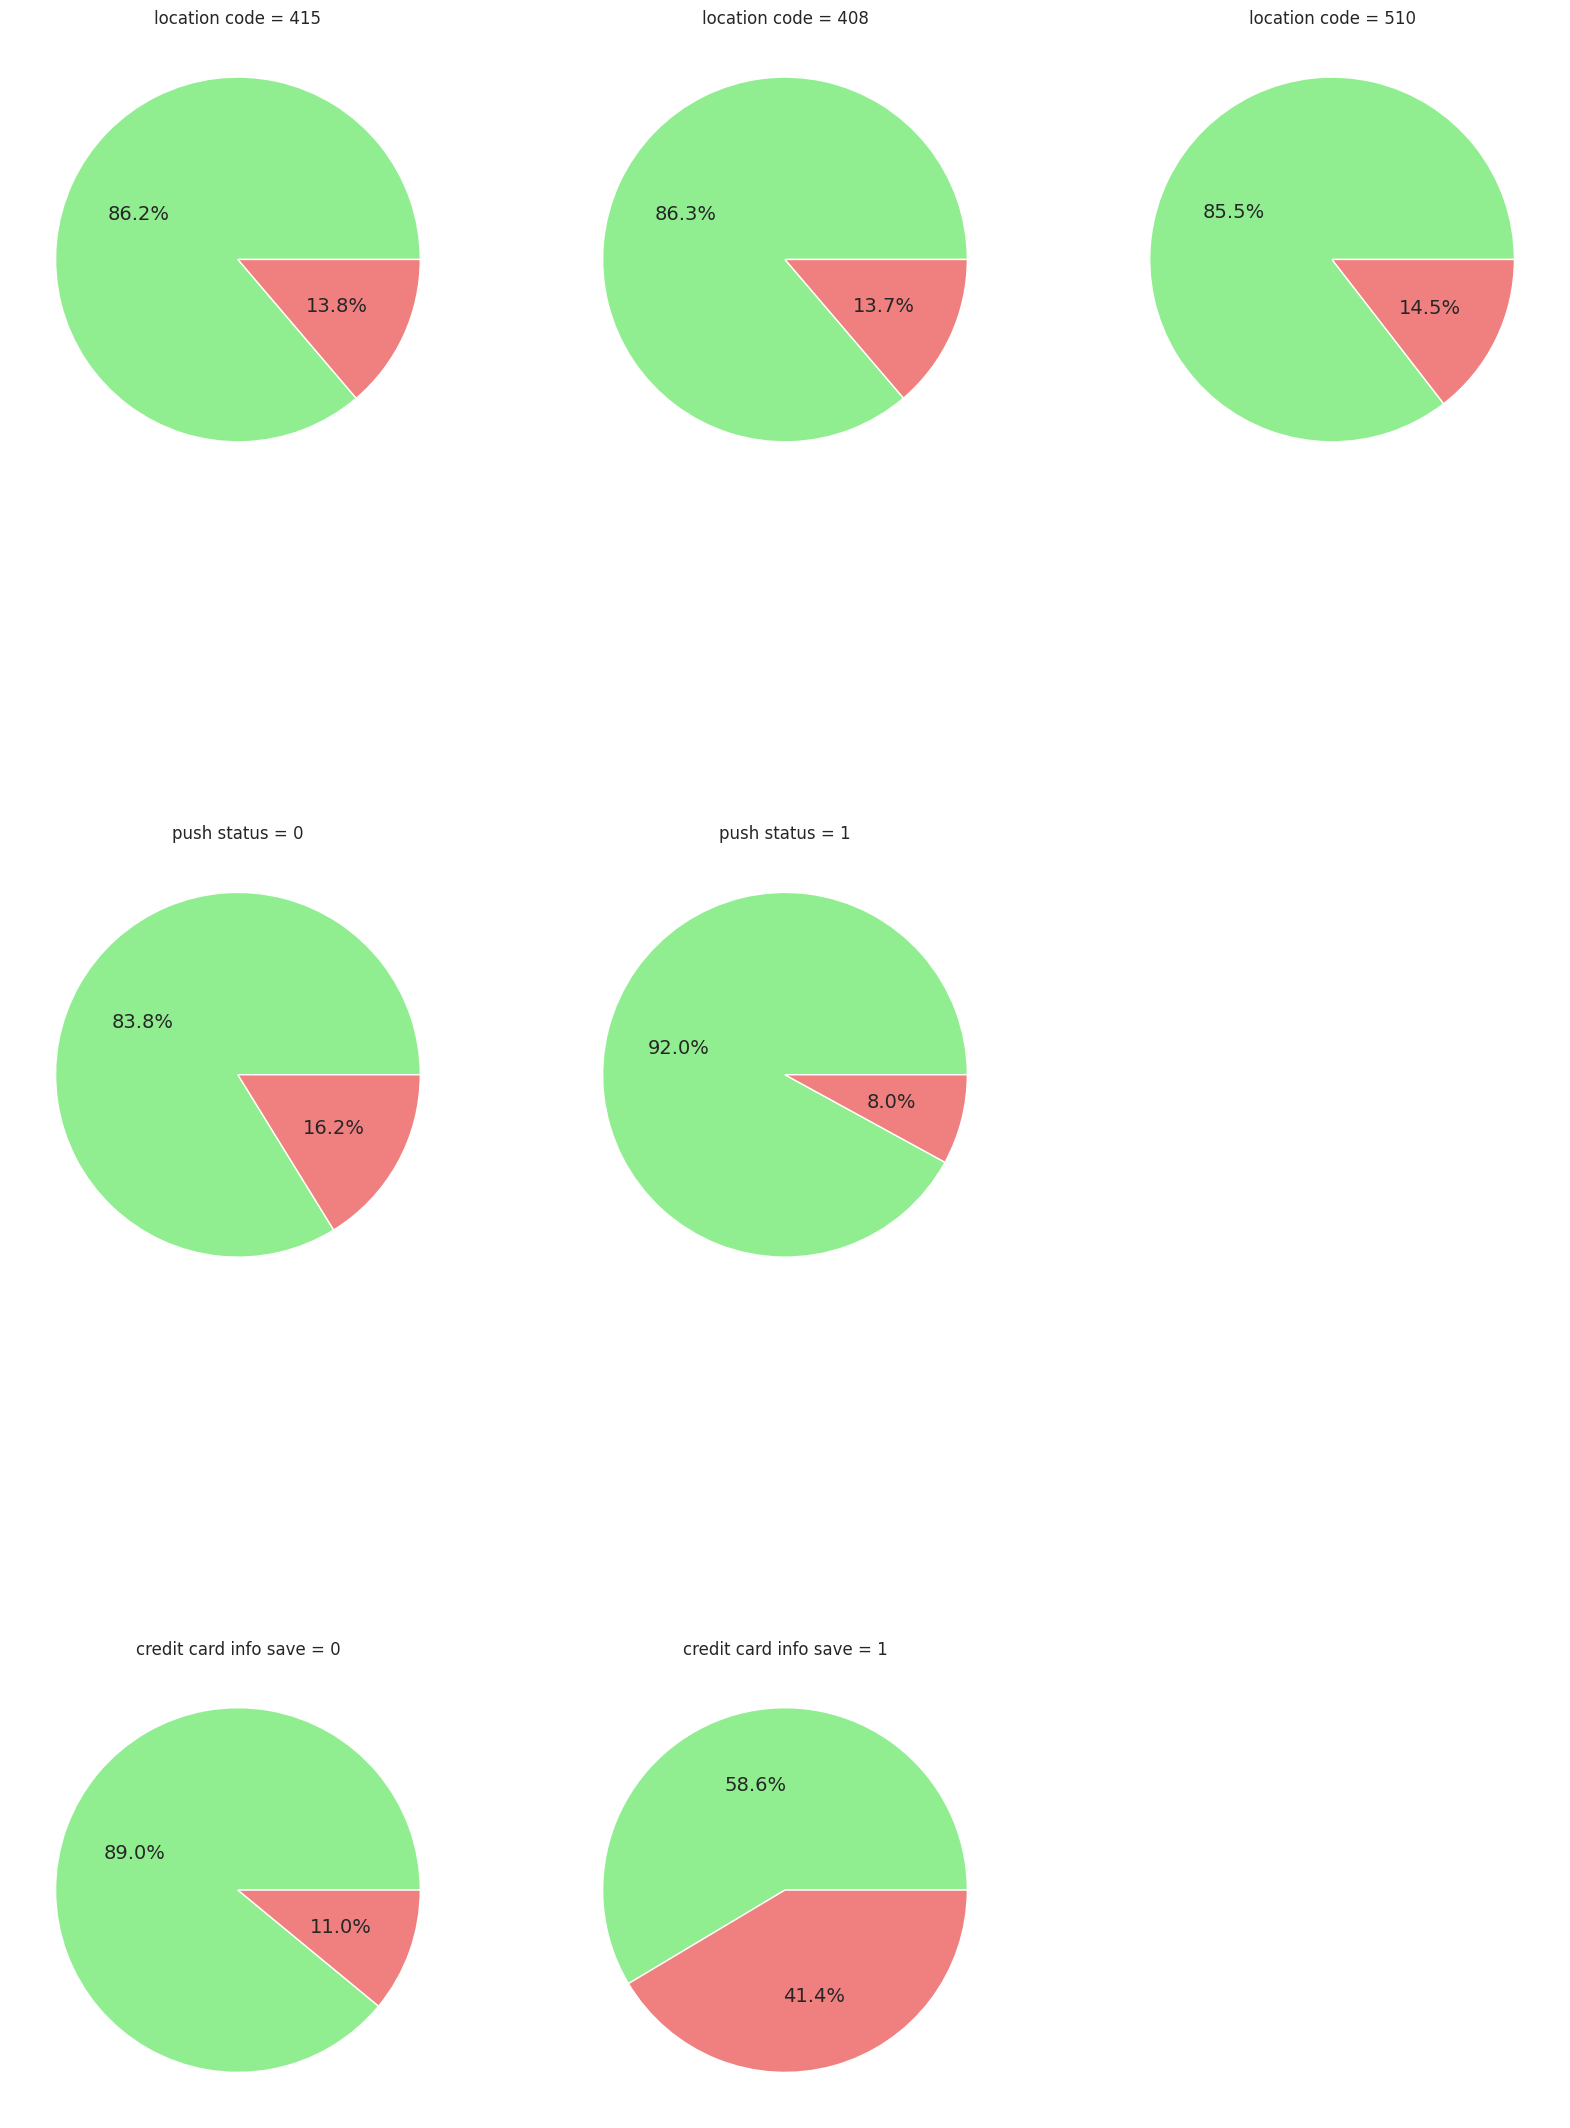

In [146]:
plt.figure(1, figsize=(20,30))
the_grid = GridSpec(3, 3)

plt.subplot(the_grid[0, 0], aspect=1, title='location code = 415')
source_pie = plt.pie(df[df[categorical_columns[0]] == df[categorical_columns[0]].unique()[0]].churn.value_counts(),colors = ["lightgreen","lightcoral"],autopct='%.1f%%',textprops={'fontsize': 14})

plt.subplot(the_grid[0, 1], aspect=1, title='location code = 408')
source_pie = plt.pie(df[df[categorical_columns[0]] == df[categorical_columns[0]].unique()[1]].churn.value_counts(),colors = ["lightgreen","lightcoral"],autopct='%.1f%%',textprops={'fontsize': 14})

plt.subplot(the_grid[0, 2], aspect=1, title='location code = 510')
source_pie = plt.pie(df[df[categorical_columns[0]] == df[categorical_columns[0]].unique()[2]].churn.value_counts(),colors = ["lightgreen","lightcoral"],autopct='%.1f%%',textprops={'fontsize': 14})

plt.subplot(the_grid[1, 0], aspect=1, title='push status = 0')
source_pie = plt.pie(df[df[categorical_columns[1]] == 0].churn.value_counts(),colors = ["lightgreen","lightcoral"],autopct='%.1f%%',textprops={'fontsize': 14})

plt.subplot(the_grid[1, 1], aspect=1, title='push status = 1')
source_pie = plt.pie(df[df[categorical_columns[1]] == 1].churn.value_counts(),colors = ["lightgreen","lightcoral"],autopct='%.1f%%',textprops={'fontsize': 14})

plt.subplot(the_grid[2, 0], aspect=1, title='credit card info save = 0')
source_pie = plt.pie(df[df[categorical_columns[2]] == 0].churn.value_counts(),colors = ["lightgreen","lightcoral"],autopct='%.1f%%',textprops={'fontsize': 14})

plt.subplot(the_grid[2, 1], aspect=1, title='credit card info save = 1')
source_pie = plt.pie(df[df[categorical_columns[2]] == 1].churn.value_counts(),colors = ["lightgreen","lightcoral"],autopct='%.1f%%',textprops={'fontsize': 14})


plt.show()


### Feature encoding

Since push_status and credit_card_save are already dummy among the categorical variables, we will avoid the dummy variable trap by making only location_code dummy and deleting one of them.

In [147]:
# NOTE: The "dummy variable trap" is a situation where two or more dummy variables are highly correlated.
# This can lead to multicollinearity issues in machine learning models. To avoid this, one dummy variable should be dropped.

one_hot = pd.get_dummies(df['location_code'], drop_first = True, prefix = "code_")
del df["location_code"]
df = df.join(one_hot)

### Baseline Model and model selection

In [148]:
Logit = LogisticRegression(solver='liblinear',random_state = 8)
Knn = KNeighborsClassifier()
Dtree = DecisionTreeClassifier(random_state = 8)
Rndfr = RandomForestClassifier(random_state = 8)

Algorithms =[Logit,Knn,Dtree,Rndfr]

In [149]:
X = df.drop(out_of_analyze, axis=1)
y = df["churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 8)

In [150]:
l = []

for i in Algorithms:
    res = i.fit(X_train,y_train)
    l.append([str(i).split("(")[0],confusion_matrix(y_test,res.predict(X_test)),f1_score(y_test,res.predict(X_test)),round(accuracy_score(y_test, res.predict(X_test)), 3)])
    print(str(i).split("(")[0]," - "," ✓")

a1 = []
for i in l:
    a1.append([i[0],
              i[1][1][1]/(i[1][1][1]+i[1][1][0]),
              i[1][0][0]/(i[1][0][1]+i[1][0][0]),
              i[1][1][1]/(i[1][0][1]+i[1][1][1]),
              i[1][0][0]/(i[1][0][0]+i[1][1][0]),
              i[1][0][1]+i[1][1][1],
              y_test.sum(),
              i[2],
              i[3]
              ]
             )

results_raw = pd.DataFrame(a1,columns = ["model","recall1","recall0","precision1","precision0","precision_sample","real_churn_count","f1score","accuracyscore"]).fillna(0)
results_raw = results_raw.sort_values("f1score",ascending = False)
results_raw

LogisticRegression  -   ✓
KNeighborsClassifier  -   ✓
DecisionTreeClassifier  -   ✓
RandomForestClassifier  -   ✓


,model,recall1,recall0,precision1,precision0,precision_sample,real_churn_count,f1score,accuracyscore
3,RandomForestClassifier,0.662069,0.996670,0.969697,0.948258,99,145,0.786885,0.950
2,DecisionTreeClassifier,0.710345,0.945616,0.677632,0.953020,152,145,0.693603,0.913
1,KNeighborsClassifier,0.282759,0.981132,0.706897,0.894737,58,145,0.403941,0.884
0,LogisticRegression,0.172414,0.982242,0.609756,0.880597,41,145,0.268817,0.870


### Feature Importance

              precision    recall  f1-score   support

           0       1.00      0.95      0.97       947
           1       0.66      0.97      0.79        99

    accuracy                           0.95      1046
   macro avg       0.83      0.96      0.88      1046
weighted avg       0.97      0.95      0.95      1046

[[898  49]
 [  3  96]]


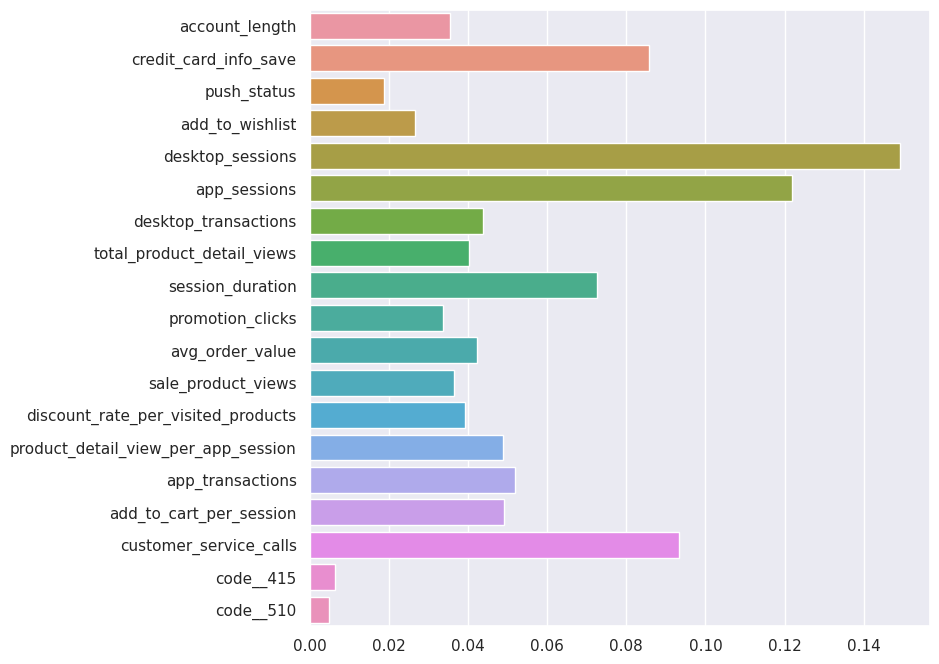

In [151]:
X = df.drop(out_of_analyze,axis = 1)
y = df.churn

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=8)

rndforest = RandomForestClassifier(random_state=8)
rndforest.fit(X_train, y_train)

y_pred = rndforest.predict(X_test)

print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))

fig, ax = plt.subplots(figsize=(8,8))
sns.barplot(x=rndforest.feature_importances_, y=X.columns)
plt.show()
